Pour le slide =>
Process de création du model:
- non-linearity ?
- normalisation !!!!
- encodage !

In [1]:
import torch
from torch import nn

from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
# Device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# 1. Data

In [3]:
# Import csv
# ! TODO Data à normaliser !!!!!!!!!!!
# df = pd.read_csv("./1_label_encoded.csv")
df = pd.read_csv("./2_normalized_with_standard_scaler_with_extra_features.csv")
# df = pd.read_csv("./2bis_normalized_with_minmax")
print(f"Nombre de classes:{len(df['label'].unique())}")
df 

Nombre de classes:10


,zcr_sum,zcr_mean,zcr_var,chroma_mean,chroma_var,rms_mean,rms_var,spectral_c_mean,spectral_c_var,spectral_bandwith_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,-1.214016,-1.213612,-1.271898,-1.203767,2.497274,-0.091854,0.485778,-0.771816,0.605568,-0.099122,...,0.696314,-1.630571,1.068829,-1.866883,0.957698,-2.047651,0.208900,-3.372445,0.171337,0
1,-1.249187,-1.248798,-1.312732,-1.395024,0.627032,-0.267733,0.314982,-1.224846,-0.744207,-0.787344,...,0.825204,0.227296,1.039779,-0.570795,1.180102,0.149920,0.608726,-1.736623,0.967246,0
2,0.323357,0.324459,0.381726,-0.819280,0.821044,-0.372798,-0.601079,0.109880,-0.118459,-0.232611,...,0.550017,-1.175433,0.843656,1.201404,4.560488,-1.541924,0.983292,-0.350787,0.874208,0
3,-0.585922,-0.585233,-0.565295,-1.284052,0.770951,-0.752545,0.357225,-0.536687,-0.428170,-0.510035,...,-0.041201,0.451344,-0.123743,-0.722501,0.565581,1.389025,0.291563,-0.818474,0.472006,0
4,-1.633756,-1.633541,-1.767987,-1.512177,1.395441,-0.683405,-0.115510,-1.466779,0.112372,-1.012164,...,2.500266,-1.351264,2.392200,-1.626074,0.439036,-1.450576,0.605148,-1.588621,1.488366,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.885576,-0.885023,-0.897060,0.647868,-1.641750,0.249688,-0.205501,-0.683258,-0.492586,0.014084,...,-1.044512,-0.070235,-1.054028,-0.820230,-0.889853,-0.324597,-1.048577,-0.090366,-0.954460,9
996,0.813475,0.814797,0.854941,0.806396,-0.776312,-0.179749,-0.301777,0.828715,0.353491,0.930864,...,-0.733421,-0.232415,-0.959919,-0.749758,-1.063593,-0.172735,-1.032977,-1.005139,-0.999015,9
997,1.256517,1.258041,1.260254,1.012602,0.013801,0.124558,-0.295154,1.112293,0.189086,0.853241,...,0.254552,0.417860,-0.283268,-0.519804,-0.342075,-0.234315,-0.529010,-1.033425,-0.756742,9
998,0.413611,0.414753,0.470827,-0.697713,0.295101,-1.030947,-0.597877,0.075959,0.155729,-0.350022,...,0.961624,-1.099362,1.739832,1.644896,2.049160,-1.163364,0.477557,-0.029436,1.147479,9


In [4]:
# df to numpy

y = df['label'].to_numpy()
x = df.drop(columns=['label']).to_numpy() # ! Type issue ?

print("X shape =>",x.shape,"\ny shape =>", y.shape)
y[:3], x[:3]

X shape => (1000, 56) 
y shape => (1000,)


(array([0, 0, 0]),
 array([[-1.21401634e+00, -1.21361151e+00, -1.27189807e+00,
         -1.20376707e+00,  2.49727357e+00, -9.18537206e-02,
          4.85778403e-01, -7.71815688e-01,  6.05567708e-01,
         -9.91224316e-02,  4.99788441e-01, -5.14581532e-01,
          1.62694029e+00,  2.17777307e-01,  3.64941692e-01,
          3.89379517e-01, -8.86739523e-01, -2.52478591e-02,
          5.14299343e-02,  4.05223299e-01,  1.22559896e+00,
         -3.24915138e-01, -7.54023866e-01, -1.13463994e-02,
          2.64232322e-01,  5.28040472e-01,  9.54901848e-01,
          1.22748672e-01, -1.19035692e+00,  3.82019561e+00,
          4.74982385e-01,  6.19051070e-01, -1.84506086e+00,
          2.48862433e-01, -4.21281238e-01,  1.11670228e+00,
         -2.52070362e+00,  2.41064989e+00, -1.56781474e+00,
          4.00819125e-01, -4.41483691e-02,  3.91875660e-01,
         -1.43055825e-01,  1.02263024e+00, -3.92575420e-01,
          7.67105891e-01, -2.06640887e+00,  6.96314225e-01,
         -1.63057133e

In [5]:
# numpy to tensor

# x = torch.from_numpy(x).type(torch.float64)
# y = torch.from_numpy(y).type(torch.float64)
x = torch.from_numpy(x).type(torch.float32)
# y = torch.from_numpy(y).type(torch.float32)
y = torch.from_numpy(y).type(torch.long)

# x = torch.from_numpy(x)
# y = torch.from_numpy(y)

x[:3], y[:3]

(tensor([[-1.2140e+00, -1.2136e+00, -1.2719e+00, -1.2038e+00,  2.4973e+00,
          -9.1854e-02,  4.8578e-01, -7.7182e-01,  6.0557e-01, -9.9122e-02,
           4.9979e-01, -5.1458e-01,  1.6269e+00,  2.1778e-01,  3.6494e-01,
           3.8938e-01, -8.8674e-01, -2.5248e-02,  5.1430e-02,  4.0522e-01,
           1.2256e+00, -3.2492e-01, -7.5402e-01, -1.1346e-02,  2.6423e-01,
           5.2804e-01,  9.5490e-01,  1.2275e-01, -1.1904e+00,  3.8202e+00,
           4.7498e-01,  6.1905e-01, -1.8451e+00,  2.4886e-01, -4.2128e-01,
           1.1167e+00, -2.5207e+00,  2.4106e+00, -1.5678e+00,  4.0082e-01,
          -4.4148e-02,  3.9188e-01, -1.4306e-01,  1.0226e+00, -3.9258e-01,
           7.6711e-01, -2.0664e+00,  6.9631e-01, -1.6306e+00,  1.0688e+00,
          -1.8669e+00,  9.5770e-01, -2.0477e+00,  2.0890e-01, -3.3724e+00,
           1.7134e-01],
         [-1.2492e+00, -1.2488e+00, -1.3127e+00, -1.3950e+00,  6.2703e-01,
          -2.6773e-01,  3.1498e-01, -1.2248e+00, -7.4421e-01, -7.8734e-01,
 

In [6]:
# split dataset

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([800, 56]),
 torch.Size([200, 56]),
 torch.Size([800]),
 torch.Size([200]))

# 2. Model

In [7]:
# ! Model chatGPT => 'rangement' des layers interessants
# class MusicClassifier(nn.Module):
#     def __init__(self, input_size, hidden_sizes, output_size, dropout_prob):
#         super(MusicClassifier, self).__init__()
#         layers = []
        
#         # Input layer
#         layers.append(nn.Linear(input_size, hidden_sizes[0]))
#         layers.append(nn.ReLU())
        
#         # Hidden layers
#         for i in range(1, len(hidden_sizes)):
#             layers.append(nn.Linear(hidden_sizes[i - 1], hidden_sizes[i]))
#             layers.append(nn.ReLU())
#             layers.append(nn.BatchNorm1d(hidden_sizes[i]))
#             layers.append(nn.Dropout(p=dropout_prob))
        
#         # Output layer
#         layers.append(nn.Linear(hidden_sizes[-1], output_size))
#         layers.append(nn.LogSoftmax(dim=1))
        
#         self.model = nn.Sequential(*layers)
    
#     def forward(self, x):
#         return self.model(x)
# model_0 = MusicClassifier(input_size=23, output_size=10, hidden_sizes=[32,64,128], dropout_prob=0.7).to(device)

In [8]:
# ! try different combination of deep, wide, dropout, other activation function than Relu 

class MusicClassifier(nn.Module):
    def __init__(self, input_features, output_features, hidden_unit):
        """
        Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        # ! Try other than RELU
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_unit, dtype=torch.float32),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(in_features=hidden_unit, out_features=hidden_unit, dtype=torch.float32),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(in_features=hidden_unit, out_features=output_features, dtype=torch.float32)
        )
    def forward(self, x):
        return self.linear_layer_stack(x)

torch.manual_seed(42)
model_0 = MusicClassifier(input_features=56, output_features=10, hidden_unit=100).to(device)

model_0

MusicClassifier(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=56, out_features=100, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=100, out_features=100, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [9]:
# Loss and optimizer

loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(model_0.parameters(), lr=0.1) # ! Try Adam
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.001) # It's better

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(input=y_true, other=y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 # Calcul simple de pourcentage
    return acc

In [10]:
# Quick forward pass
y_logits_quick_test = model_0(X_test.to(device))
torch.softmax(y_logits_quick_test, dim=1).argmax(dim=1)

tensor([6, 2, 7, 2, 8, 7, 5, 6, 6, 6, 2, 5, 6, 6, 6, 6, 3, 3, 7, 6, 0, 2, 5, 5,
        5, 6, 6, 6, 6, 2, 2, 6, 2, 3, 2, 0, 5, 2, 6, 2, 3, 2, 2, 2, 5, 2, 5, 2,
        6, 6, 3, 2, 2, 3, 7, 8, 6, 5, 6, 5, 6, 2, 6, 6, 6, 5, 2, 6, 2, 5, 3, 2,
        6, 6, 2, 2, 2, 2, 3, 5, 2, 3, 7, 3, 2, 6, 5, 7, 5, 7, 5, 2, 5, 6, 2, 6,
        5, 6, 6, 6, 2, 6, 5, 6, 2, 6, 6, 5, 0, 6, 6, 2, 2, 5, 6, 7, 0, 2, 3, 6,
        5, 6, 2, 2, 2, 8, 6, 0, 6, 6, 0, 6, 6, 6, 8, 5, 6, 5, 3, 7, 0, 6, 3, 5,
        2, 5, 6, 6, 6, 2, 6, 6, 6, 5, 2, 6, 6, 2, 3, 0, 5, 2, 2, 6, 6, 6, 5, 2,
        6, 2, 6, 6, 6, 6, 6, 5, 6, 7, 6, 7, 2, 2, 6, 5, 6, 5, 6, 2, 7, 5, 6, 6,
        6, 3, 2, 2, 7, 2, 6, 5], device='cuda:0')

# 3. Training

In [11]:
torch.manual_seed(42)

epochs = 5000

loss_history = []
acc_history = []
test_loss_history = []
test_acc_history = []

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    '''
    Train
    '''
    model_0.train()

    # 1. Forward pass
    y_logits = model_0(X_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

    # 2. Metrics
    loss = loss_fn(y_logits,
                   y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    
    # 2.1 Save metrics
    loss_history.append(loss.cpu().detach().numpy())
    acc_history.append(acc)

    # 3. Zero Grad
    optimizer.zero_grad()

    # 4. Backpropagation
    loss.backward()

    # 5. Optimmizer step
    optimizer.step()

    '''
    Test
    '''
    model_0.eval()

    with torch.inference_mode():
        # 1. Forward pass
        y_test_logits = model_0(X_test)
        y_test_pred = torch.softmax(y_test_logits, dim=1).argmax(dim=1)

        # 2. Metrics
        test_loss = loss_fn(y_test_logits,
                            y_test)
        test_acc = accuracy_fn(y_pred=y_test_pred,
                               y_true=y_test)
        
        # 2.1 Save metrics
        test_loss_history.append(test_loss.cpu().detach().numpy())
        test_acc_history.append(test_acc)
    
    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 2.30228, Acc: 10.75% | Test Loss: 2.27329, Test Acc: 20.50%
Epoch: 100 | Loss: 0.71654, Acc: 74.12% | Test Loss: 0.83613, Test Acc: 70.00%
Epoch: 200 | Loss: 0.32337, Acc: 89.38% | Test Loss: 0.75376, Test Acc: 75.00%
Epoch: 300 | Loss: 0.17940, Acc: 95.12% | Test Loss: 0.82637, Test Acc: 73.00%
Epoch: 400 | Loss: 0.12991, Acc: 96.88% | Test Loss: 0.89306, Test Acc: 74.00%
Epoch: 500 | Loss: 0.08367, Acc: 98.12% | Test Loss: 1.01816, Test Acc: 72.50%
Epoch: 600 | Loss: 0.05208, Acc: 98.62% | Test Loss: 1.04405, Test Acc: 72.50%
Epoch: 700 | Loss: 0.05452, Acc: 98.12% | Test Loss: 1.12096, Test Acc: 71.50%
Epoch: 800 | Loss: 0.03893, Acc: 98.75% | Test Loss: 1.18745, Test Acc: 74.00%
Epoch: 900 | Loss: 0.03819, Acc: 98.50% | Test Loss: 1.26742, Test Acc: 72.50%
Epoch: 1000 | Loss: 0.03239, Acc: 99.12% | Test Loss: 1.25377, Test Acc: 73.50%
Epoch: 1100 | Loss: 0.03233, Acc: 98.88% | Test Loss: 1.32295, Test Acc: 75.00%
Epoch: 1200 | Loss: 0.02936, Acc: 99.12% | Test Loss

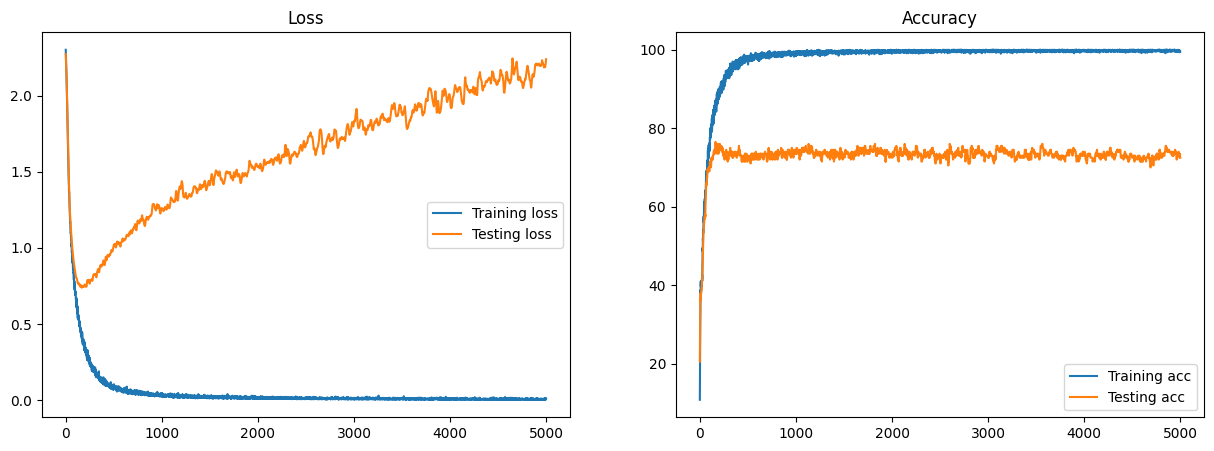

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(epochs), loss_history, label="Training loss")
plt.plot(range(epochs), test_loss_history, label="Testing loss")
plt.legend()
plt.title("Loss")

plt.subplot(1,2,2)
plt.plot(range(epochs), acc_history, label="Training acc")
plt.plot(range(epochs), test_acc_history, label="Testing acc")
plt.legend()
plt.title("Accuracy")

plt.show()